Project 1, Netflix and YouTube Data Analysis

Uploading Netflix csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


Uploading YouTube csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving USvideos.csv to USvideos.csv


Loading The Datasets

Installing Seaborn

In [ ]:
!pip install seaborn --quiet

Looking for available seaborn styles

In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Importing Libraries and Loading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) #Optional :- Display Settings.
plt.style.use('seaborn-v0_8-darkgrid')
netflix_df = pd.read_csv('netflix_titles.csv') #Loading Netflix dataset.
youtube_df = pd.read_csv('USvideos.csv') #Loading Netflix dataset.

Basic Info and First Look

In [ ]:
print("Netflix shape:", netflix_df.shape) #creating shape for netflix.
print("Youtube shape:", youtube_df.shape) #creating shape for youtube.

print(netflix_df.head()) #show top 5 rows for netflix.
print(youtube_df.head()) #show top 5 rows for youtube.

print(netflix_df.isnull().sum()) #check for missing values for netflix.
print(youtube_df.isnull().sum()) #checking for missing values for youtube.

Netflix shape: (8807, 14)
Youtube shape: (40949, 16)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2

Cleaning Netflix dataset

In [ ]:
netflix_df.dropna(subset=['title','type'], inplace=True) #Drop rows with missing titles or rows.
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors = 'coerce') #Convert 'date_added to datetime.
netflix_df['year_added'] = netflix_df['date_added'].dt.year #Extract year and month.
netflix_df['month_added'] = netflix_df['date_added'].dt.month #Extract year and month.

In [ ]:
# Converted 'date_added' to datetime format
# Using errors = 'coerce' to handle invalid or missing values.

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')


Cleaning YouTube dataset

In [ ]:
youtube_df['publish_time'] = pd.to_datetime(youtube_df['publish_time'], errors = 'coerce') #converting publish_time to datetime.
youtube_df['publish_year'] = youtube_df['publish_time'].dt.year #Extracting the year.
youtube_df['publish_month'] = youtube_df['publish_time'].dt.month #Extracting the month.

youtube_df.drop_duplicates(subset='video_id', inplace = True) #Dropping duplicates.

In [ ]:
# Converted 'publish_time' to datetime format
# Using errors = 'coerce' to handle invalid or missing values
# Added frop.duplicates to drop the duplicates (if any).

youtube_df.drop_duplicates(subset='video_id', inplace = True)

Netflix EDA (Exploration Data Analysis)

1. Content Type Distribution

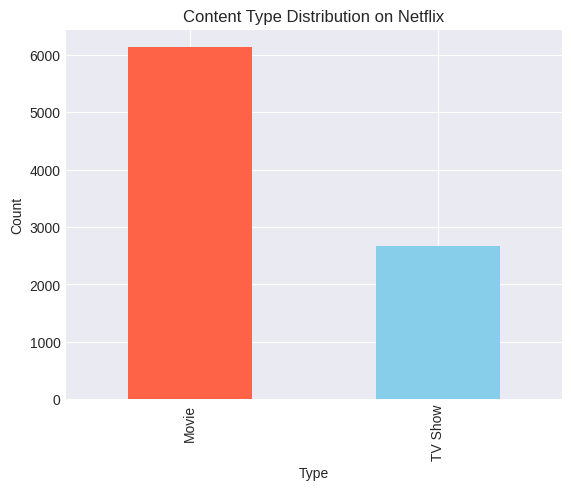

In [ ]:
netflix_df['type'].value_counts().plot(kind = 'bar', color=['tomato','skyblue']) #Count of movies vs Tv Shows
plt.title('Content Type Distribution on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

2. Top 10 Countries Producing Netflix Content

<function matplotlib.pyplot.show(close=None, block=None)>

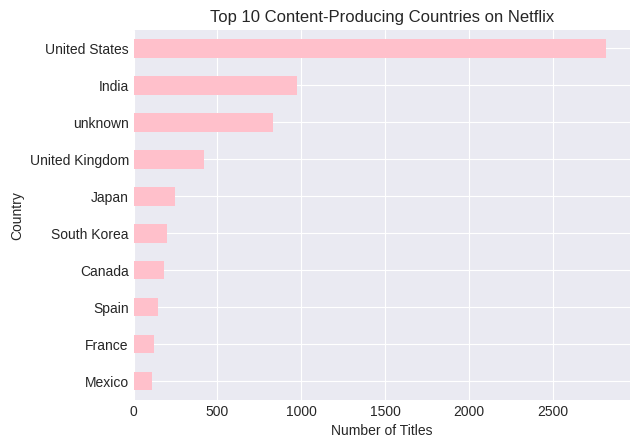

In [ ]:
netflix_df['country'] = netflix_df['country'].fillna('unknown') #Cleaning country coloumn.
top_countries = netflix_df['country'].value_counts().head(10) #Top 10 Countries.
top_countries.plot(kind='barh', color='pink')
plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis() #Flipping so top country is on top.
plt.show

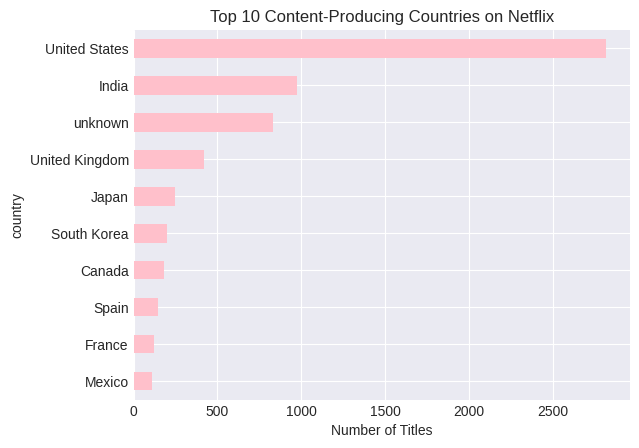

In [ ]:
# Plotting top 10 countries with the most Netflix content
# Using invert_yaxis() to show the top country or largest values to appear on the top
# Using gca() to get the current axes.
top_countries.plot(kind='barh', color='pink')
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()

3. Content added over the years

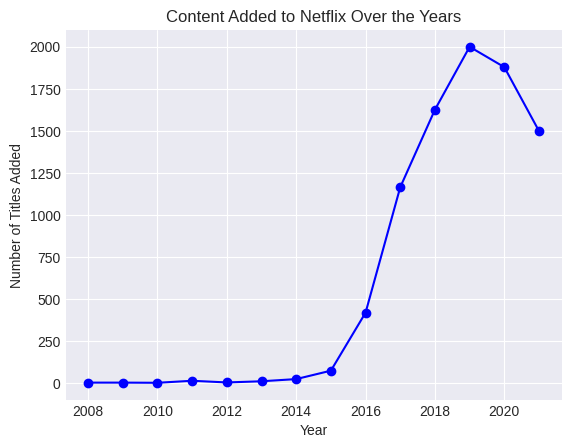

In [ ]:
netflix_df['year_added'].value_counts().sort_index().plot(kind ='line', marker = 'o', color = 'blue')
#Sorting the years.
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

<Axes: xlabel='year_added'>

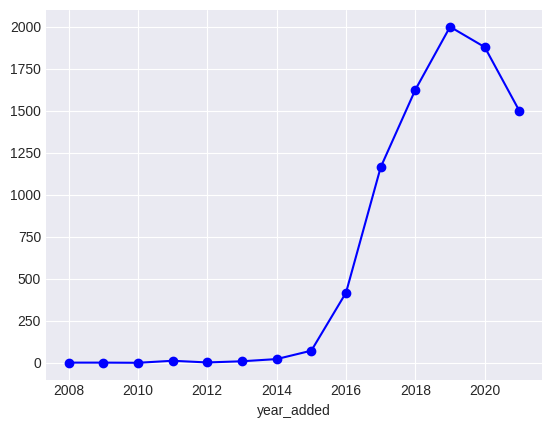

In [ ]:
# Creating a line plot
# For that we used sort_index() to sort the years
# Sorting is required so that the years comes in a chronological order.
netflix_df['year_added'].value_counts().sort_index().plot(kind ='line', marker = 'o', color = 'blue')

YouTube EDA(Exploration Data Analysis)

1. Top 10 Video Categories

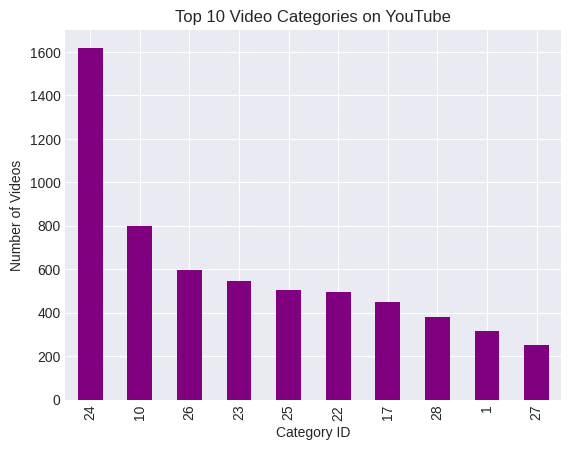

In [ ]:
youtube_df['category_id'].value_counts().head(10).plot(kind = 'bar', color = 'purple')
# Plotting the top 10 most frequent YouTube videos.
plt.title('Top 10 Video Categories on YouTube')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.show()

In [ ]:
# Plotting the top 10 most frequent YouTube video categories by their category_id.
# This helps in understanding which types of content are most commonly uploaded.
youtube_df['category_id'].value_counts().head(10).plot(kind='bar', color='purple')


2. Most Viewed Videos

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure

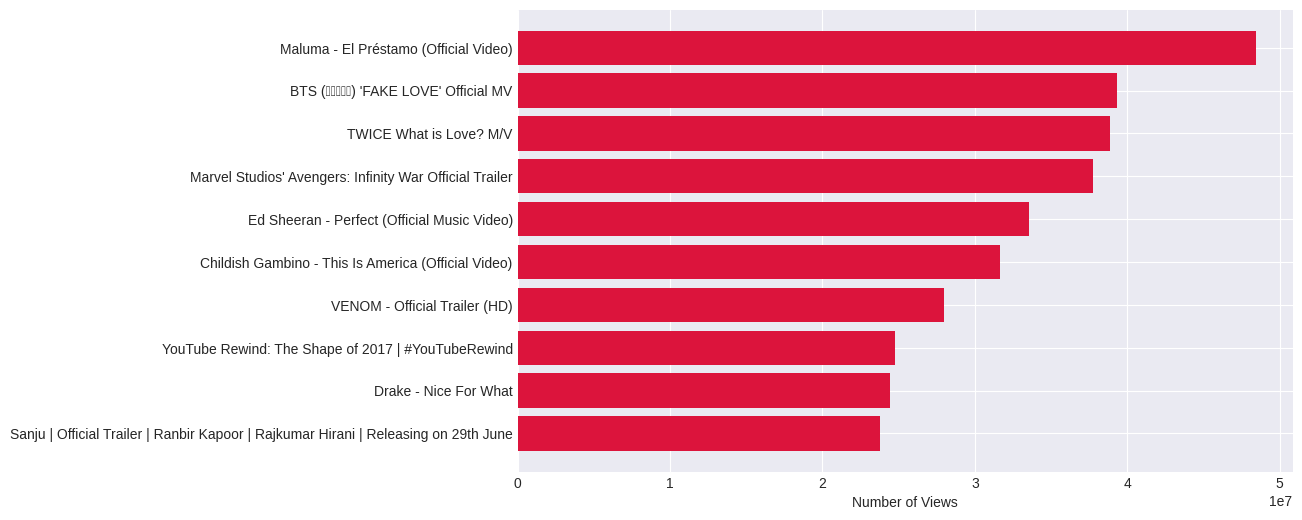

In [ ]:
top_videos = youtube_df[['title','views']].sort_values(by = 'views', ascending = False).head(10)
#Sorting the dataset based on the 'views' coloumn in descending order.
#Horizontal Bar Chart Plotting
plt.figure(figsize = (10,6))
plt.barh(top_videos['title'], top_videos['views'], color = 'crimson')
plt.xlabel('Number of Views')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Extracting the top 10 most viewed YouTube videos by sorting the dataset based on the 'views' column
#Creating a horizontal bar plot to show the larger values and videos on top.
top_videos = youtube_df[['title','views']].sort_values(by = 'views', ascending = False).head(10)

3. Channel with Most Trending Videos

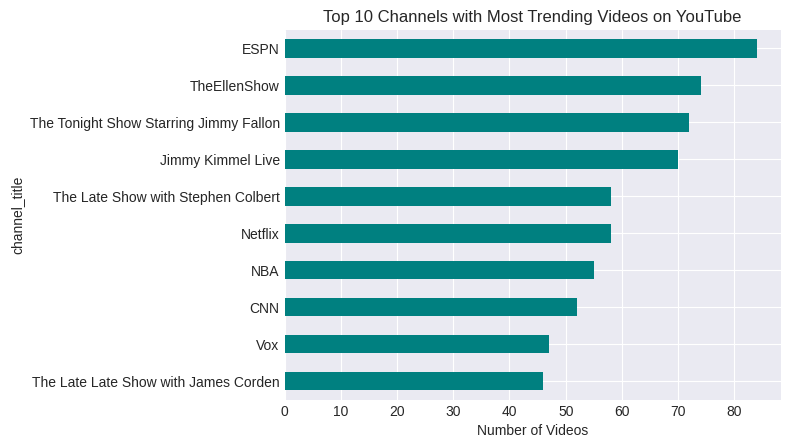

In [ ]:
top_channels = youtube_df['channel_title'].value_counts().head(10)
#Identifying the top 10 channels with the most videos uploaded according to the dataset
#Horizontal Bar Chart plotting
top_channels.plot(kind = 'barh', color = 'teal')
plt.title('Top 10 Channels with Most Trending Videos on YouTube')
plt.xlabel('Number of Videos')
plt.gca().invert_yaxis()
plt.show()

4. Like to Dislike Ratio(Engagement Metric)

In [ ]:
# Filtering out rows where dislikes is zero to avoid division by zero error.
youtube_df = youtube_df[youtube_df['dislikes'] != 0]
# Creating the ratio column
youtube_df['likes_dislikes_ratio'] = youtube_df['likes'] / youtube_df['dislikes']
# Sorting and getting top 10
top_ratio_videos = youtube_df.sort_values(by='likes_dislikes_ratio', ascending=False)[['title', 'likes_dislikes_ratio']].head(10)
top_ratio_videos


,title,likes_dislikes_ratio
7933,Jonghyun Lonely (Feat. 태연) - Piano Cover,1737.333333
11667,THINGS THAT ARE LOWER,843.200000
5147,JUST GO SHOOT. A PHOTOGRAPHY VLOG 137,667.285714
11577,GOALS GOALS GOALS,587.000000
6141,"Interview with Clarice Lispector - São Paulo, ...",552.000000
191,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,533.921053
9210,[STATION] SMTOWN 'Dear My Family (Live Concert...,506.257299
6262,"This Man Has Comforted Over 1,200 Newborns",495.333333
5664,CHRISTMAS PANIC! - Topi the Corgi,453.750000
11468,Riverdale's Casey Cott Reviews Riverdale Memes...,448.166667


In [ ]:
# Filtering out videos with 0 dislikes to prevent division by zero errors.
# Creating a new column for the ratio of likes to dislikes
# Sorting videos by likes/dislikes ratio to find th top 10 most positively received videos
youtube_df = youtube_df[youtube_df['dislikes'] != 0]
youtube_df['likes_dislikes_ratio'] = youtube_df['likes'] / youtube_df['dislikes']
top_ratio_videos = youtube_df.sort_values(by='likes_dislikes_ratio', ascending=False)[['title', 'likes_dislikes_ratio']].head(10)
top_ratio_videos


,title,likes_dislikes_ratio
7933,Jonghyun Lonely (Feat. 태연) - Piano Cover,1737.333333
11667,THINGS THAT ARE LOWER,843.200000
5147,JUST GO SHOOT. A PHOTOGRAPHY VLOG 137,667.285714
11577,GOALS GOALS GOALS,587.000000
6141,"Interview with Clarice Lispector - São Paulo, ...",552.000000
191,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,533.921053
9210,[STATION] SMTOWN 'Dear My Family (Live Concert...,506.257299
6262,"This Man Has Comforted Over 1,200 Newborns",495.333333
5664,CHRISTMAS PANIC! - Topi the Corgi,453.750000
11468,Riverdale's Casey Cott Reviews Riverdale Memes...,448.166667
